# Import Necessary Library 

In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from os import path
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Import Dataset

In [2]:
df_raw = pd.read_csv("/kaggle/input/mqtt-protocol-mitm/MitM.csv", low_memory=False)
df_raw.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_invalid,frame.time_relative,ip.src,ip.dst,tcp.srcport,tcp.dstport,eth.src,...,mqtt.topic,mqtt.topic_len,mqtt.username,mqtt.username_len,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,type
0,0.000000,0.000000,1.529668e+09,NaN,0.000000,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
1,0.000481,0.000481,1.529668e+09,NaN,0.000481,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
2,0.000423,0.000423,1.529668e+09,NaN,0.000904,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
3,0.000274,0.000274,1.529668e+09,NaN,0.001178,192.168.1.102,192.168.1.1,53940.0,22.0,30:5a:3a:62:72:80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
4,0.000861,0.000861,1.529668e+09,NaN,0.002039,192.168.1.102,192.168.1.1,53940.0,22.0,30:5a:3a:62:72:80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal


In [3]:
df_raw.shape

(110668, 67)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110668 entries, 0 to 110667
Data columns (total 67 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.time_delta            110668 non-null  float64
 1   frame.time_delta_displayed  110668 non-null  float64
 2   frame.time_epoch            110668 non-null  float64
 3   frame.time_invalid          0 non-null       float64
 4   frame.time_relative         110668 non-null  float64
 5   ip.src                      102435 non-null  object 
 6   ip.dst                      102435 non-null  object 
 7   tcp.srcport                 99514 non-null   float64
 8   tcp.dstport                 99514 non-null   float64
 9   eth.src                     110668 non-null  object 
 10  eth.dst                     110668 non-null  object 
 11  frame.cap_len               110668 non-null  int64  
 12  frame.coloring_rule.name    0 non-null       float64
 13  frame.coloring

In [5]:
df_raw.isnull().sum()

frame.time_delta                   0
frame.time_delta_displayed         0
frame.time_epoch                   0
frame.time_invalid            110668
frame.time_relative                0
                               ...  
mqtt.willmsg                  110668
mqtt.willmsg_len              110668
mqtt.willtopic                110668
mqtt.willtopic_len            110668
type                               0
Length: 67, dtype: int64

In [6]:
df_raw.describe()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_invalid,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.coloring_rule.name,frame.coloring_rule.string,...,mqtt.sub.qos,mqtt.suback.qos,mqtt.topic_len,mqtt.username,mqtt.username_len,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len
count,110668.000000,110668.000000,1.106680e+05,0.0,110668.000000,99514.000000,99514.000000,110668.000000,0.0,0.0,...,0.0,0.0,2035.00000,0.0,0.0,4.0,0.0,0.0,0.0,0.0
mean,0.042530,0.042530,1.529670e+09,NaN,2359.017074,18620.800460,30743.571266,697.234711,NaN,NaN,...,NaN,NaN,19.47371,NaN,NaN,4.0,NaN,NaN,NaN,NaN
std,0.285306,0.285306,1.322856e+03,NaN,1322.855997,23694.914764,23271.825659,695.599642,NaN,NaN,...,NaN,NaN,2.61748,NaN,NaN,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.000000,1.529668e+09,NaN,0.000000,22.000000,22.000000,20.000000,NaN,NaN,...,NaN,NaN,5.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
25%,0.000087,0.000087,1.529669e+09,NaN,1231.207322,443.000000,443.000000,60.000000,NaN,NaN,...,NaN,NaN,20.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
50%,0.000138,0.000138,1.529670e+09,NaN,2049.681080,443.000000,40607.000000,146.000000,NaN,NaN,...,NaN,NaN,20.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
75%,0.001966,0.001966,1.529671e+09,NaN,3498.407867,49176.000000,50766.000000,1514.000000,NaN,NaN,...,NaN,NaN,20.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN
max,9.885142,9.885142,1.529673e+09,NaN,4706.571592,60979.000000,60979.000000,1514.000000,NaN,NaN,...,NaN,NaN,20.00000,NaN,NaN,4.0,NaN,NaN,NaN,NaN


In [7]:
df_raw['type'].value_counts()

type
normal    106813
mitm        3855
Name: count, dtype: int64

In [8]:
# Drop columns with too many missing values (e.g., 50% or more)
threshold = 0.5
df = df_raw.copy()
df = df.loc[:, df.isnull().mean() < threshold]

# Impute remaining null values using median for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Forward fill for categorical columns (if applicable)
cat_cols = df.select_dtypes(include=[object]).columns
df[cat_cols] = df[cat_cols].ffill()


In [9]:
df['type'] = df['type'].map({'normal': 1, 'mitm': 0})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110668 entries, 0 to 110667
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   frame.time_delta            110668 non-null  float64
 1   frame.time_delta_displayed  110668 non-null  float64
 2   frame.time_epoch            110668 non-null  float64
 3   frame.time_relative         110668 non-null  float64
 4   ip.src                      110668 non-null  object 
 5   ip.dst                      110668 non-null  object 
 6   tcp.srcport                 110668 non-null  float64
 7   tcp.dstport                 110668 non-null  float64
 8   eth.src                     110668 non-null  object 
 9   eth.dst                     110668 non-null  object 
 10  frame.cap_len               110668 non-null  float64
 11  frame.encap_type            110668 non-null  float64
 12  frame.ignored               110668 non-null  float64
 13  frame.len     

In [11]:
df.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,ip.src,ip.dst,tcp.srcport,tcp.dstport,eth.src,eth.dst,frame.cap_len,frame.encap_type,frame.ignored,frame.len,frame.marked,frame.number,frame.offset_shift,type
0,0.000000,0.000000,1.529668e+09,0.000000,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,30:5a:3a:62:72:80,134.0,1.0,0.0,134.0,0.0,1.0,0.0,1
1,0.000481,0.000481,1.529668e+09,0.000481,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,30:5a:3a:62:72:80,150.0,1.0,0.0,150.0,0.0,2.0,0.0,1
2,0.000423,0.000423,1.529668e+09,0.000904,192.168.1.1,192.168.1.102,22.0,53940.0,18:a6:f7:eb:77:26,30:5a:3a:62:72:80,118.0,1.0,0.0,118.0,0.0,3.0,0.0,1
3,0.000274,0.000274,1.529668e+09,0.001178,192.168.1.102,192.168.1.1,53940.0,22.0,30:5a:3a:62:72:80,18:a6:f7:eb:77:26,66.0,1.0,0.0,66.0,0.0,4.0,0.0,1
4,0.000861,0.000861,1.529668e+09,0.002039,192.168.1.102,192.168.1.1,53940.0,22.0,30:5a:3a:62:72:80,18:a6:f7:eb:77:26,66.0,1.0,0.0,66.0,0.0,5.0,0.0,1


In [12]:
# Select only numeric columns for correlation analysis
numeric_df = df.copy()
num_col = numeric_df.select_dtypes(include=[np.number]).columns
data_num = df[num_col].copy()
data_num.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,frame.marked,frame.number,frame.offset_shift,type
0,0.000000,0.000000,1.529668e+09,0.000000,22.0,53940.0,134.0,1.0,0.0,134.0,0.0,1.0,0.0,1
1,0.000481,0.000481,1.529668e+09,0.000481,22.0,53940.0,150.0,1.0,0.0,150.0,0.0,2.0,0.0,1
2,0.000423,0.000423,1.529668e+09,0.000904,22.0,53940.0,118.0,1.0,0.0,118.0,0.0,3.0,0.0,1
3,0.000274,0.000274,1.529668e+09,0.001178,53940.0,22.0,66.0,1.0,0.0,66.0,0.0,4.0,0.0,1
4,0.000861,0.000861,1.529668e+09,0.002039,53940.0,22.0,66.0,1.0,0.0,66.0,0.0,5.0,0.0,1


In [13]:
data_num.shape

(110668, 14)

In [14]:
cat_col = df.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['eth.src', 'ip.dst', 'ip.src'], dtype='object')

In [15]:
# creating a dataframe with only categorical attributes
data_cat = df_raw[cat_col].copy()
data_cat.head()

,eth.src,ip.dst,ip.src
0,18:a6:f7:eb:77:26,192.168.1.102,192.168.1.1
1,18:a6:f7:eb:77:26,192.168.1.102,192.168.1.1
2,18:a6:f7:eb:77:26,192.168.1.102,192.168.1.1
3,30:5a:3a:62:72:80,192.168.1.1,192.168.1.102
4,30:5a:3a:62:72:80,192.168.1.1,192.168.1.102


In [16]:
data_num.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,frame.marked,frame.number,frame.offset_shift,type
0,0.000000,0.000000,1.529668e+09,0.000000,22.0,53940.0,134.0,1.0,0.0,134.0,0.0,1.0,0.0,1
1,0.000481,0.000481,1.529668e+09,0.000481,22.0,53940.0,150.0,1.0,0.0,150.0,0.0,2.0,0.0,1
2,0.000423,0.000423,1.529668e+09,0.000904,22.0,53940.0,118.0,1.0,0.0,118.0,0.0,3.0,0.0,1
3,0.000274,0.000274,1.529668e+09,0.001178,53940.0,22.0,66.0,1.0,0.0,66.0,0.0,4.0,0.0,1
4,0.000861,0.000861,1.529668e+09,0.002039,53940.0,22.0,66.0,1.0,0.0,66.0,0.0,5.0,0.0,1


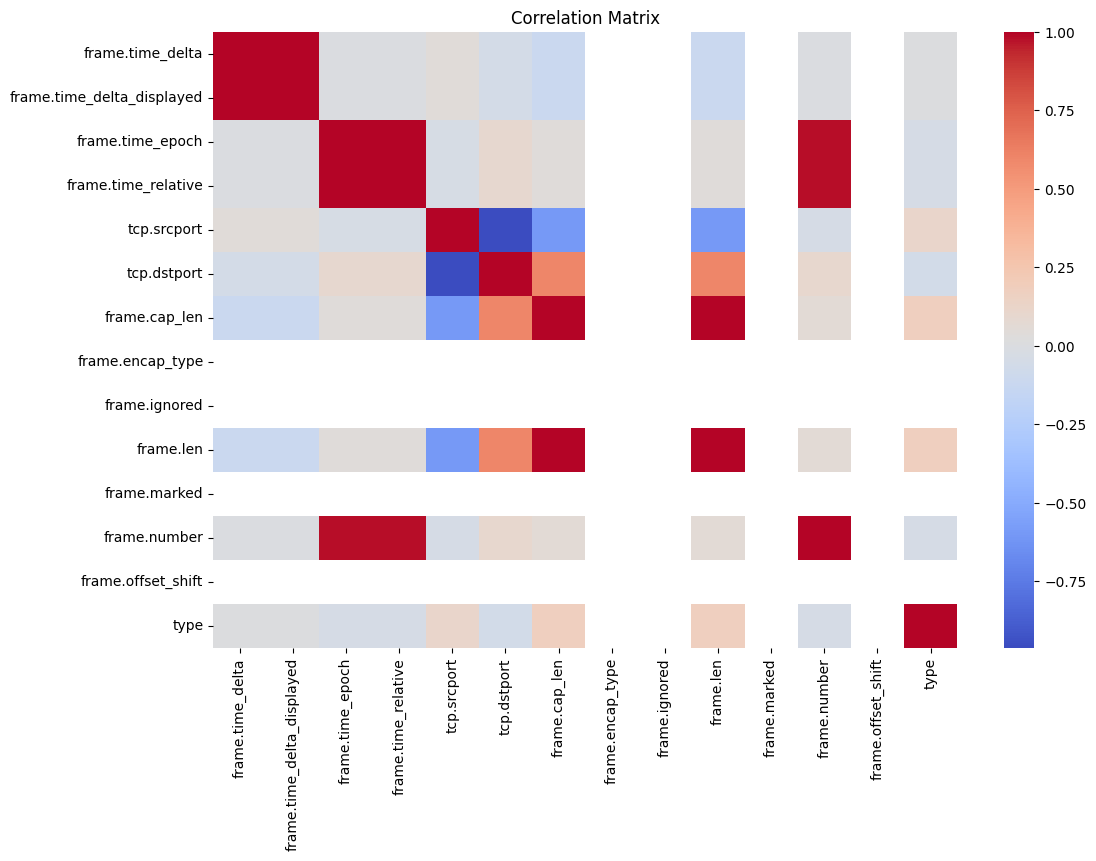

In [17]:
# Correlation analysis for numeric features pertimbangkan untuk drop yang korelasinya rendah
corr_matrix = data_num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [19]:
data_cat.head()

,eth.src_18:a6:f7:eb:77:26,eth.src_30:5a:3a:62:72:80,eth.src_48:5a:3f:93:39:9c,eth.src_4c:74:03:07:92:4f,eth.src_60:01:94:37:e0:e1,eth.src_68:c6:3a:8b:d0:1e,eth.src_74:d4:35:ed:f7:06,eth.src_74:d4:35:ef:e5:5a,eth.src_a0:20:a6:17:44:ed,eth.src_b8:27:eb:73:32:30,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df = pd.concat([df, data_cat],axis=1)

In [21]:
df.columns

Index(['frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'eth.src', 'eth.dst',
       ...
       'ip.src_89.255.249.53', 'ip.src_91.189.89.198', 'ip.src_91.215.103.66',
       'ip.src_93.184.220.70', 'ip.src_93.93.51.190', 'ip.src_93.93.51.200',
       'ip.src_93.93.53.190', 'ip.src_93.93.53.191', 'ip.src_94.23.82.225',
       'ip.src_95.211.229.246'],
      dtype='object', length=522)

In [22]:
df.drop(columns=cat_col,inplace=True)

# Data Normalization

In [23]:
num_col = list(df.select_dtypes(include='number').columns)
num_col.remove('type')

In [24]:
num_col

['frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_epoch',
 'frame.time_relative',
 'tcp.srcport',
 'tcp.dstport',
 'frame.cap_len',
 'frame.encap_type',
 'frame.ignored',
 'frame.len',
 'frame.marked',
 'frame.number',
 'frame.offset_shift']

In [25]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))

In [26]:
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [27]:
df.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,eth.dst,frame.cap_len,frame.encap_type,frame.ignored,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.000000,0.000000,1.529668e+09,0.000000,22.0,53940.0,30:5a:3a:62:72:80,134.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.000481,0.000481,1.529668e+09,0.000481,22.0,53940.0,30:5a:3a:62:72:80,150.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.000423,0.000423,1.529668e+09,0.000904,22.0,53940.0,30:5a:3a:62:72:80,118.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.000274,0.000274,1.529668e+09,0.001178,53940.0,22.0,18:a6:f7:eb:77:26,66.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.000861,0.000861,1.529668e+09,0.002039,53940.0,22.0,18:a6:f7:eb:77:26,66.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df_normalization = df.copy()
df_normalization = normalization(df.copy(),num_col)

In [29]:
df_normalization = df_normalization.drop(columns=['eth.dst'])

In [30]:
df_normalization.columns

Index(['frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'tcp.srcport', 'tcp.dstport', 'frame.cap_len',
       'frame.encap_type', 'frame.ignored', 'frame.len',
       ...
       'ip.src_89.255.249.53', 'ip.src_91.189.89.198', 'ip.src_91.215.103.66',
       'ip.src_93.184.220.70', 'ip.src_93.93.51.190', 'ip.src_93.93.51.200',
       'ip.src_93.93.53.190', 'ip.src_93.93.53.191', 'ip.src_94.23.82.225',
       'ip.src_95.211.229.246'],
      dtype='object', length=518)

In [31]:
df_normalization['type'].value_counts()

type
1    106813
0      3855
Name: count, dtype: int64

In [32]:
# label
bin_label = pd.DataFrame(df_normalization['type'])

In [33]:
bin_label.value_counts()

type
1       106813
0         3855
Name: count, dtype: int64

In [34]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = df_normalization.copy()

# Menambahkan kolom 'type' dengan bin_label
bin_data['type'] = bin_label

In [35]:
bin_data['type'].value_counts()

type
1    106813
0      3855
Name: count, dtype: int64

In [36]:
import pandas as pd

# Contoh: Salin DataFrame normalisasi
bin_data = df_normalization.copy()

# Pastikan bin_label adalah Series atau list dengan panjang yang sesuai
if isinstance(bin_label, (list, np.ndarray)):
    bin_label = pd.Series(bin_label)

# Cek apakah panjang bin_label sama dengan bin_data
if len(bin_data) == len(bin_label):
    bin_data['type'] = bin_label
else:
    print("Panjang bin_label tidak sesuai dengan jumlah baris bin_data.")

# Menampilkan beberapa baris untuk memeriksa
print(bin_data.head())
print(bin_data.columns)  # Memeriksa semua kolom dalam bin_data


   frame.time_delta  frame.time_delta_displayed  frame.time_epoch  \
0          0.000000                    0.000000      0.000000e+00   
1          0.000049                    0.000049      1.022127e-07   
2          0.000043                    0.000043      1.920853e-07   
3          0.000028                    0.000028      2.502929e-07   
4          0.000087                    0.000087      4.332396e-07   

   frame.time_relative  tcp.srcport  tcp.dstport  frame.cap_len  \
0         0.000000e+00     0.000000     0.884525       0.076305   
1         1.021975e-07     0.000000     0.884525       0.087015   
2         1.920719e-07     0.000000     0.884525       0.065596   
3         2.502883e-07     0.884525     0.000000       0.030790   
4         4.332240e-07     0.884525     0.000000       0.030790   

   frame.encap_type  frame.ignored  frame.len  ...  ip.src_89.255.249.53  \
0               0.0            0.0   0.076305  ...                 False   
1               0.0           

In [37]:
bin_label = bin_label.replace({1: 'normal', 0: 'MitM'})

In [38]:
bin_label.head()

,type
0,normal
1,normal
2,normal
3,normal
4,normal


In [39]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['type'] = enc_label

In [40]:
le1.classes_

array(['MitM', 'normal'], dtype=object)

In [41]:
bin_label.value_counts()

type  
normal    106813
MitM        3855
Name: count, dtype: int64

# Data Visualization

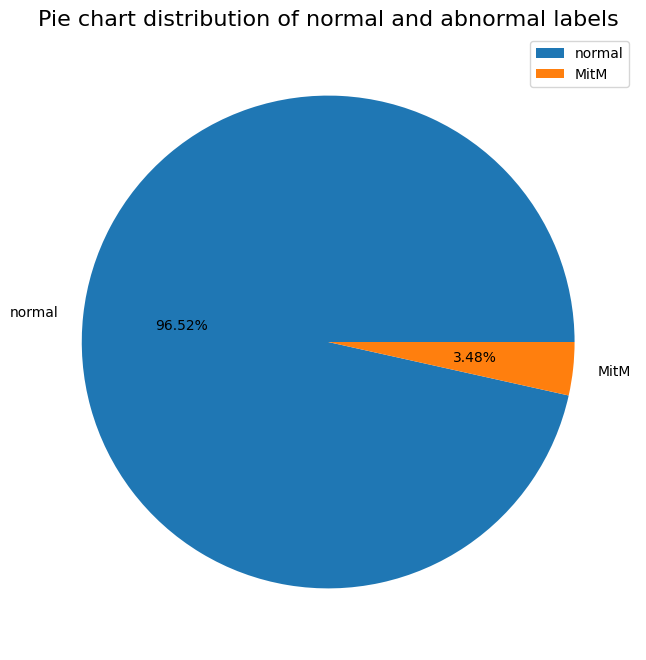

In [42]:
plt.figure(figsize=(8,8))
plt.pie(df_raw.type.value_counts(),labels=['normal','MitM'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

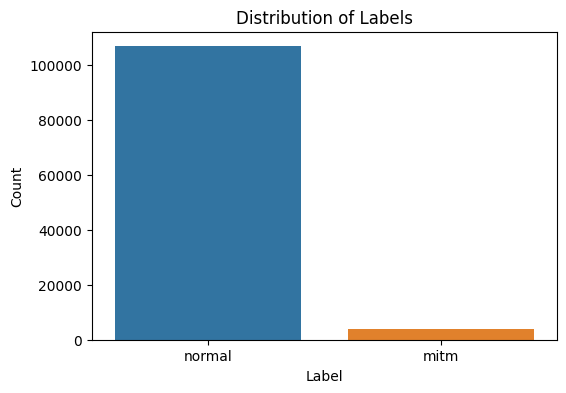

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the labels
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df_raw)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


# SMOTE

Dikarenakan jauhnya perbedaan pada distribusi label, kita akan menyamaratakan labelnya menggunakan metode SMOTE

In [44]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [45]:
bin_data.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.884525,0.076305,0.0,0.0,0.076305,...,False,False,False,False,False,False,False,False,False,False
1,0.000049,0.000049,1.022127e-07,1.021975e-07,0.000000,0.884525,0.087015,0.0,0.0,0.087015,...,False,False,False,False,False,False,False,False,False,False
2,0.000043,0.000043,1.920853e-07,1.920719e-07,0.000000,0.884525,0.065596,0.0,0.0,0.065596,...,False,False,False,False,False,False,False,False,False,False
3,0.000028,0.000028,2.502929e-07,2.502883e-07,0.884525,0.000000,0.030790,0.0,0.0,0.030790,...,False,False,False,False,False,False,False,False,False,False
4,0.000087,0.000087,4.332396e-07,4.332240e-07,0.884525,0.000000,0.030790,0.0,0.0,0.030790,...,False,False,False,False,False,False,False,False,False,False


In [46]:
X = bin_data.drop(columns=['type'],axis=1)
y = bin_data['type']

In [47]:
y

0         1
1         1
2         1
3         1
4         1
         ..
110663    1
110664    1
110665    1
110666    1
110667    1
Name: type, Length: 110668, dtype: int64

In [48]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y, test_size=0.2, random_state=50)

In [49]:
X_test_bin

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
58986,0.000099,0.000099,0.457781,0.457781,0.006907,0.845777,0.966533,0.0,0.0,0.966533,...,False,False,False,False,False,False,False,False,False,False
53801,0.000012,0.000012,0.431252,0.431252,0.006907,0.780452,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
87446,0.006748,0.006748,0.826909,0.826909,0.806569,0.030530,0.040830,0.0,0.0,0.040830,...,False,False,False,False,False,False,False,False,False,False
108121,0.008008,0.008008,0.984696,0.984696,0.805994,0.030530,0.024096,0.0,0.0,0.024096,...,False,False,False,False,False,False,False,False,False,False
60530,0.000013,0.000013,0.461724,0.461724,0.006907,0.665797,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10954,0.000005,0.000005,0.168426,0.168426,0.646554,0.021523,0.030790,0.0,0.0,0.030790,...,False,False,False,False,False,False,False,False,False,False
39472,0.000116,0.000116,0.313294,0.313294,0.048854,0.826123,0.042169,0.0,0.0,0.042169,...,False,False,False,False,False,False,False,False,False,False
75078,0.000016,0.000016,0.658492,0.658492,0.006907,0.926342,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
41459,0.000013,0.000013,0.336307,0.336307,0.006907,0.665797,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False


In [92]:
y_test_bin.value_counts()

type
1    21380
0      754
Name: count, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [51]:
X_train_bin

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
30487,0.001588,0.001588,0.279230,0.279230,0.048854,0.937546,0.046854,0.0,0.0,0.046854,...,False,False,False,False,False,False,False,False,False,False
49962,0.000012,0.000012,0.406085,0.406085,0.006907,0.665797,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
23069,0.000012,0.000012,0.242265,0.242265,0.826123,0.048854,0.022758,0.0,0.0,0.022758,...,False,False,False,False,False,False,False,False,False,False
64239,0.000013,0.000013,0.489106,0.489106,0.006907,0.940433,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
105180,0.000014,0.000014,0.962674,0.962674,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48417,0.000008,0.000008,0.392446,0.392446,0.006907,0.665797,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
22637,0.000009,0.000009,0.242218,0.242218,0.006907,0.601933,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
108427,0.000100,0.000100,0.987253,0.987253,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
103904,0.000076,0.000076,0.962598,0.962598,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False


In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_bin, y_train_bin)

from collections import Counter
print(f"Distribusi kelas sebelum SMOTE: {Counter(y_train_bin)}")
print(f"Distribusi kelas setelah SMOTE: {Counter(y_resampled)}")

Distribusi kelas sebelum SMOTE: Counter({1: 85433, 0: 3101})
Distribusi kelas setelah SMOTE: Counter({1: 85433, 0: 85433})


In [53]:
X_resampled

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.001588,0.001588,0.279230,0.279230,0.048854,0.937546,0.046854,0.0,0.0,0.046854,...,False,False,False,False,False,False,False,False,False,False
1,0.000012,0.000012,0.406085,0.406085,0.006907,0.665797,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
2,0.000012,0.000012,0.242265,0.242265,0.826123,0.048854,0.022758,0.0,0.0,0.022758,...,False,False,False,False,False,False,False,False,False,False
3,0.000013,0.000013,0.489106,0.489106,0.006907,0.940433,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
4,0.000014,0.000014,0.962674,0.962674,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170861,0.000007,0.000007,0.858812,0.858812,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
170862,0.001005,0.001005,0.515116,0.515116,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
170863,0.000003,0.000003,0.743049,0.743049,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
170864,0.001091,0.001091,0.954359,0.954359,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False


In [54]:
y_resampled

0         1
1         1
2         1
3         1
4         1
         ..
170861    0
170862    0
170863    0
170864    0
170865    0
Name: type, Length: 170866, dtype: int64

In [55]:
y_resampled.value_counts()

type
1    85433
0    85433
Name: count, dtype: int64

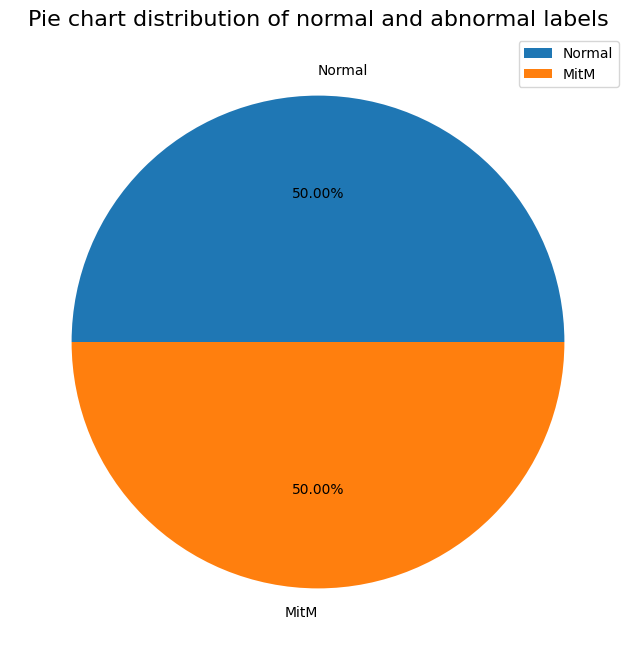

In [56]:
plt.figure(figsize=(8,8))
plt.pie(y_resampled.value_counts(),labels=['Normal','MitM'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
# plt.savefig('/content/gdrive/My Drive/ASDOS/template/Topik1_Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba/plot/Pie_chart_binary2.png')
plt.show()

In [57]:
bin_data

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.884525,0.076305,0.0,0.0,0.076305,...,False,False,False,False,False,False,False,False,False,False
1,0.000049,0.000049,1.022127e-07,1.021975e-07,0.000000,0.884525,0.087015,0.0,0.0,0.087015,...,False,False,False,False,False,False,False,False,False,False
2,0.000043,0.000043,1.920853e-07,1.920719e-07,0.000000,0.884525,0.065596,0.0,0.0,0.065596,...,False,False,False,False,False,False,False,False,False,False
3,0.000028,0.000028,2.502929e-07,2.502883e-07,0.884525,0.000000,0.030790,0.0,0.0,0.030790,...,False,False,False,False,False,False,False,False,False,False
4,0.000087,0.000087,4.332396e-07,4.332240e-07,0.884525,0.000000,0.030790,0.0,0.0,0.030790,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110663,0.000080,0.000080,9.999996e-01,9.999996e-01,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
110664,0.000012,0.000012,9.999996e-01,9.999996e-01,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
110665,0.000080,0.000080,9.999998e-01,9.999998e-01,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
110666,0.000012,0.000012,9.999998e-01,9.999998e-01,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False


# Import Transformer

In [58]:
!pip install transformers tensorflow

# Transformer Encoder

# Normalization dan Standarization

In [59]:
X = X_resampled
y = y_resampled

In [60]:
le1.classes_

array(['MitM', 'normal'], dtype=object)

In [61]:
class_names = le1.classes_

In [62]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data training hasil SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# Normalisasi data testing (menggunakan scaler yang sama)
X_test_scaled = scaler.transform(X_test_bin)

In [63]:
# Terapkan PCA tanpa menentukan n_components
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Varians kumulatif
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Varians kumulatif: {cumulative_variance}')

# Tentukan jumlah komponen untuk menjelaskan 95% varians
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Jumlah komponen utama yang menjelaskan 95% varians: {n_components}')



Varians kumulatif: [0.01112177 0.01897481 0.02570581 0.0317221  0.03700639 0.04192855
 0.04674338 0.05093412 0.05490312 0.05885357 0.06259772 0.06624567
 0.06963042 0.07293453 0.07575891 0.07830336 0.08049713 0.08252406
 0.08453532 0.08654172 0.08854472 0.09054149 0.09253666 0.09452749
 0.09651619 0.09850403 0.10048793 0.1024715  0.10445332 0.10643413
 0.10841427 0.11039296 0.112371   0.11434788 0.11632448 0.11830064
 0.12027664 0.12225211 0.1242273  0.12620215 0.12817678 0.13015069
 0.13212438 0.13409767 0.1360705  0.13804293 0.14001534 0.1419876
 0.14395961 0.14593128 0.14790283 0.14987437 0.15184567 0.15381696
 0.1557882  0.15775938 0.15973047 0.16170153 0.16367247 0.16564337
 0.16761424 0.16958507 0.17155586 0.17352654 0.17549721 0.17746785
 0.17943838 0.18140888 0.18337932 0.18534971 0.18732002 0.18929032
 0.19126053 0.19323071 0.19520084 0.19717094 0.19914102 0.20111104
 0.20308105 0.20505104 0.20702102 0.20899099 0.21096091 0.21293081
 0.21490068 0.21687052 0.21884031 0.22081007

In [64]:
# Terapkan PCA dengan 459 komponen
pca_95 = PCA(n_components=459)
X_train_reduced = pca_95.fit_transform(X_train_scaled)
X_test_reduced = pca_95.transform(X_test_scaled)

# # Melatih model pada data hasil PCA
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_reduced, y_train_resampled)

# # Evaluasi model pada data testing
# from sklearn.metrics import classification_report
# y_pred = model.predict(X_test_reduced)
# print(classification_report(y_test, y_pred))


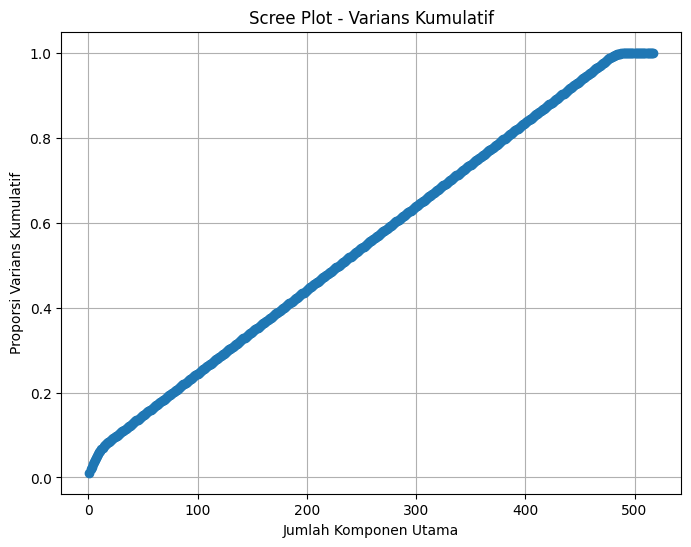

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi varians kumulatif
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Scree Plot - Varians Kumulatif')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Proporsi Varians Kumulatif')
plt.grid(True)
plt.show()


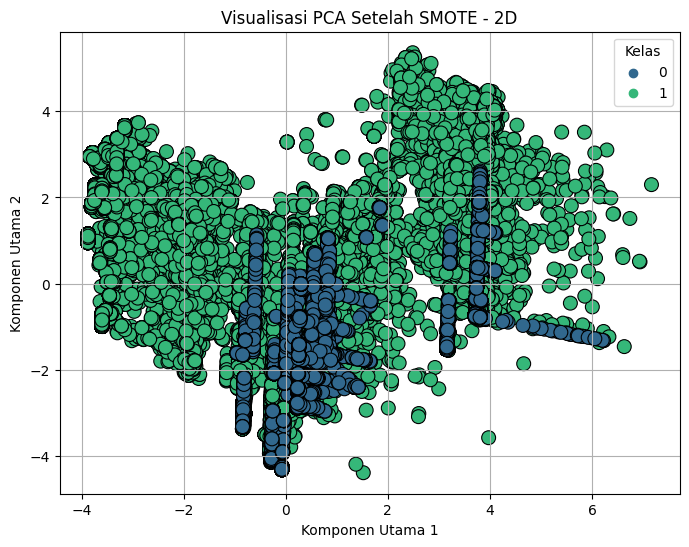

In [66]:
import seaborn as sns

# Visualisasi hasil PCA dalam 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_resampled, palette='viridis', s=100, edgecolor='k')
plt.title('Visualisasi PCA Setelah SMOTE - 2D')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.grid(True)
plt.legend(title='Kelas')
plt.show()


In [67]:
X_resampled

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.001588,0.001588,0.279230,0.279230,0.048854,0.937546,0.046854,0.0,0.0,0.046854,...,False,False,False,False,False,False,False,False,False,False
1,0.000012,0.000012,0.406085,0.406085,0.006907,0.665797,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
2,0.000012,0.000012,0.242265,0.242265,0.826123,0.048854,0.022758,0.0,0.0,0.022758,...,False,False,False,False,False,False,False,False,False,False
3,0.000013,0.000013,0.489106,0.489106,0.006907,0.940433,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
4,0.000014,0.000014,0.962674,0.962674,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170861,0.000007,0.000007,0.858812,0.858812,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
170862,0.001005,0.001005,0.515116,0.515116,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
170863,0.000003,0.000003,0.743049,0.743049,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False
170864,0.001091,0.001091,0.954359,0.954359,0.006907,0.665797,0.014726,0.0,0.0,0.014726,...,False,False,False,False,False,False,False,False,False,False


In [69]:
X_resampled.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,tcp.srcport,tcp.dstport,frame.cap_len,frame.encap_type,frame.ignored,frame.len,...,ip.src_89.255.249.53,ip.src_91.189.89.198,ip.src_91.215.103.66,ip.src_93.184.220.70,ip.src_93.93.51.190,ip.src_93.93.51.200,ip.src_93.93.53.190,ip.src_93.93.53.191,ip.src_94.23.82.225,ip.src_95.211.229.246
0,0.001588,0.001588,0.279230,0.279230,0.048854,0.937546,0.046854,0.0,0.0,0.046854,...,False,False,False,False,False,False,False,False,False,False
1,0.000012,0.000012,0.406085,0.406085,0.006907,0.665797,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
2,0.000012,0.000012,0.242265,0.242265,0.826123,0.048854,0.022758,0.0,0.0,0.022758,...,False,False,False,False,False,False,False,False,False,False
3,0.000013,0.000013,0.489106,0.489106,0.006907,0.940433,1.000000,0.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
4,0.000014,0.000014,0.962674,0.962674,0.006907,0.833046,0.981258,0.0,0.0,0.981258,...,False,False,False,False,False,False,False,False,False,False


# Hyperparameter tuning

# 

In [71]:
y_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 170866 entries, 0 to 170865
Series name: type
Non-Null Count   Dtype
--------------   -----
170866 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [72]:
# best_params = study.best_trial.params

In [73]:
best_params = {
    'lr': 7.673447190334156e-05,
    'batch_size': 32,
    'num_layers': 2,
    'nhead': 4,
    'num_epochs': 26,
    'patience': 8
}

In [74]:
best_params

{'lr': 7.673447190334156e-05,
 'batch_size': 32,
 'num_layers': 2,
 'nhead': 4,
 'num_epochs': 26,
 'patience': 8}

Test

In [ ]:
# # Melatih model pada data hasil PCA
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_reduced, y_train_resampled)

# # Evaluasi model pada data testing
# from sklearn.metrics import classification_report
# y_pred = model.predict(X_test_reduced)
# print(classification_report(y_test, y_pred))

In [87]:
X_test_red = pd.DataFrame(X_test_reduced)
X_test_red

,0,1,2,3,4,5,6,7,8,9,...,449,450,451,452,453,454,455,456,457,458
0,-3.404703,1.922525,0.521574,0.205813,-0.007321,0.760137,0.631816,-1.525631,0.287007,2.657934,...,0.004608,0.014289,1.428107e-02,0.015081,6.147892e-03,6.539618e-04,-2.048240e-09,2.741428e-10,-1.033009e-09,-1.631554e-09
1,-3.602119,2.150586,0.784418,0.145825,0.086994,-0.298318,-1.166994,1.319846,-0.631646,-2.299873,...,0.000874,0.000586,-8.456656e-04,0.000403,2.829235e-04,5.078097e-05,-1.573780e-10,2.026409e-11,-8.195100e-11,-1.280975e-10
2,3.754351,-0.204276,4.166090,2.279604,3.354645,3.868504,-2.309262,-1.997071,-1.129296,-0.212386,...,-0.000046,-0.000003,-8.235847e-06,0.000008,9.479993e-07,3.737547e-08,-9.261977e-14,5.192591e-14,-1.459053e-13,-4.822233e-14
3,3.437372,-0.649586,3.623579,1.806946,2.641246,3.179833,-1.568093,0.106174,0.547399,-0.237194,...,-0.000028,0.000002,-1.488648e-05,-0.000015,-1.470715e-06,-1.146784e-08,9.631563e-14,-2.416860e-14,6.426961e-15,4.150776e-14
4,-3.323534,2.502684,0.274228,0.373576,-0.056685,0.975090,0.728288,-1.860987,0.325886,3.101965,...,0.000294,0.000677,6.044490e-04,0.000379,1.623844e-04,2.411710e-05,-7.542018e-11,9.356097e-12,-3.732485e-11,-6.018094e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22129,3.339078,2.755877,-1.089919,3.386406,4.540961,-2.809896,1.817050,-0.229082,-0.260509,-0.221188,...,0.000003,-0.000020,-1.103817e-07,0.000020,-5.129352e-06,1.739436e-09,-5.992181e-14,2.914075e-14,-6.643584e-14,-5.091066e-14
22130,-0.788948,-1.128633,-1.649774,-0.063488,-0.307177,2.083381,4.081459,-0.860333,-0.078159,-1.589739,...,0.000020,0.000039,-2.429605e-05,0.000030,-6.086414e-06,-1.307432e-08,-6.747231e-14,2.865243e-14,-1.175476e-14,5.530830e-14
22131,-3.873740,1.117741,2.011700,-0.254878,0.216957,-0.578162,-1.040522,1.420890,-0.631104,-2.254275,...,0.000429,0.000132,-1.277788e-03,0.000894,9.894081e-05,5.203490e-05,-1.640623e-10,2.226894e-11,-8.515462e-11,-1.313870e-10
22132,-3.310383,2.973935,-0.332000,0.554810,-0.117690,1.091469,0.682188,-1.891194,0.325897,3.075938,...,0.000290,0.000674,6.046465e-04,0.000380,1.671928e-04,2.411792e-05,-7.538835e-11,9.371043e-12,-3.734722e-11,-6.018237e-11


In [85]:
X_train_red = pd.DataFrame(X_train_reduced)
X_train_red

,0,1,2,3,4,5,6,7,8,9,...,449,450,451,452,453,454,455,456,457,458
0,-0.917695,-0.387607,-2.650477,0.377676,-0.437499,2.706095,3.871701,-1.426681,-0.169438,-0.648871,...,0.000009,0.000007,-0.000001,-0.000010,-6.877798e-06,2.918763e-08,-1.443773e-13,-1.294505e-14,-1.772504e-14,-7.805962e-14
1,-3.316937,2.732388,-0.021086,0.462677,-0.087085,1.031963,0.706665,-1.876062,0.326140,3.089518,...,0.000292,0.000676,0.000604,0.000378,1.664158e-04,2.411862e-05,-7.538987e-11,9.363919e-12,-3.734009e-11,-6.018589e-11
2,3.804266,2.405775,1.093992,3.226544,-2.618316,0.341646,0.169216,-0.205160,-0.104101,-0.260883,...,0.000035,-0.000060,0.000014,0.000032,-4.476438e-06,3.902174e-10,-3.113401e-14,9.355503e-16,-8.095731e-14,5.145737e-14
3,-3.807058,1.801627,1.010370,0.050846,0.108937,-0.353136,-1.153569,1.353404,-0.628461,-2.311685,...,0.000887,0.000602,-0.000826,0.000404,2.788997e-04,5.078398e-05,-1.574283e-10,2.023192e-11,-8.191525e-11,-1.280847e-10
4,-3.601400,-0.857191,4.349760,-1.177542,0.469046,-0.706721,1.347869,-0.432599,0.561586,1.201326,...,-0.000534,-0.000696,0.000481,0.000206,-5.144397e-06,3.041327e-05,-9.700724e-11,1.286106e-11,-4.792806e-11,-7.686033e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170861,0.232484,-2.419090,0.351280,-0.440521,-0.051209,-0.687296,-0.702793,-0.016439,0.031383,0.383045,...,0.000012,0.000012,0.000002,-0.000028,7.958433e-06,-9.976995e-09,1.502170e-13,-5.432844e-14,8.011209e-14,-2.027959e-15
170862,0.261958,-1.418154,-0.937469,-0.058077,-0.159012,-0.419161,-0.813905,-0.058657,0.038896,0.322896,...,0.000009,0.000009,0.000004,-0.000003,-5.443266e-06,-2.390282e-08,1.488976e-14,-2.697988e-14,8.776648e-14,4.923456e-14
170863,0.240670,-2.090488,-0.072388,-0.318119,-0.090401,-0.607034,-0.739302,-0.035792,0.030045,0.363672,...,0.000011,0.000011,0.000003,-0.000019,2.613085e-06,-1.518176e-08,9.783604e-14,-4.553315e-14,8.479930e-14,1.692429e-14
170864,0.227151,-2.774170,0.809669,-0.567970,0.008192,-0.749867,-0.669272,0.024795,0.043404,0.401063,...,0.000015,0.000014,0.000002,-0.000028,4.805258e-06,-1.026883e-08,1.297387e-13,-6.549937e-14,9.598984e-14,-1.871101e-15


In [84]:
y_resampled

0         1
1         1
2         1
3         1
4         1
         ..
170861    0
170862    0
170863    0
170864    0
170865    0
Name: type, Length: 170866, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize feature data
scaler = StandardScaler()
X_bin = scaler.fit_transform(X_train_red)  # X_resampled should be your input features
y_bin = y_resampled.values  # y_resampled should be your target labels

# 2. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 64)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=2, batch_first=True),
            num_layers=2
        )
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores, all_recall_scores = [], [], []
conf_matrix_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X_bin)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X_bin[train_index], X_bin[val_index]
    y_train, y_val = y_bin[train_index], y_bin[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Lists for storing loss and accuracy values for each epoch
    train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []
    num_epochs = 50
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        # Training loop
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
        
        scheduler.step()
        
        # Calculate average training loss and accuracy for this epoch
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            val_loss = criterion(y_pred_probs, y_val_tensor).item()
            val_running_loss += val_loss
            _, y_pred = torch.max(y_pred_probs, 1)
        
        # Append validation loss and accuracy
        val_losses.append(val_running_loss)
        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    recall = recall_score(y_val, y_pred.numpy(), average='weighted')
    all_recall_scores.append(recall)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'Recall for fold {fold + 1}: {recall:.4f}')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_)
    print(cls_report)

    # Plot loss and accuracy for the current fold
    plt.figure(figsize=(14, 10))
    
    # Plot for training and validation loss
    plt.subplot(2, 1, 1)
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f'Loss for Fold {fold + 1}')
    plt.legend()
    
    # Plot for training and validation accuracy
    plt.subplot(2, 1, 2)
    plt.plot(train_accuracies, label="Training Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f'Accuracy for Fold {fold + 1}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average Recall: {np.mean(all_recall_scores):.4f}')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Plot accuracy, recall, and F1 score across all folds
folds = np.arange(1, len(all_accuracy) + 1)

# Plot Accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(folds, np.array(all_accuracy) * 100, marker='o', label='Accuracy (%)')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Fold')
plt.xticks(folds)  # Ensure x-axis corresponds to fold numbers
plt.legend()
plt.grid(True)
plt.show()

# Plot Recall per fold
plt.figure(figsize=(10, 6))
plt.plot(folds, all_recall_scores, marker='o', label='Recall')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.title('Recall per Fold')
plt.xticks(folds)  # Ensure x-axis corresponds to fold numbers
plt.legend()
plt.grid(True)
plt.show()

# # Plot F1 Score per fold
# plt.figure(figsize=(10, 6))
# plt.plot(folds, all_f1_scores, marker='o', label='F1 Score')
# plt.xlabel('Fold')
# plt.ylabel('F1 Score')
# plt.title('F1 Score per Fold')
# plt.xticks(folds)  # Ensure x-axis corresponds to fold numbers
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# 5. Testing
# Assume `X_test` dan `y_test` adalah dataset testing yang sudah dipersiapkan sebelumnya
# X_test adalah data fitur dan y_test adalah label yang sesuai

# Normalize test data using the same scaler
X_test = scaler.fit_transform(X_test_red)
y_test = y_test_bin.values

# Convert to PyTorch tensor
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create DataLoader for the test dataset
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model (load the best model from the fold with highest accuracy)
best_fold = np.argmax(all_accuracy)  # Get the fold with the highest accuracy
model_path = f'model_fold_{best_fold + 1}.pt'
model.load_state_dict(torch.load(model_path))

# Put model in evaluation mode
model.eval()

# Testing loop
test_running_loss = 0.0
correct_test = 0
total_test = 0
y_test_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item()
        
        # Calculate test accuracy
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)
        
        y_test_pred.extend(predicted.numpy())

# Calculate average test loss and accuracy
avg_test_loss = test_running_loss / len(test_loader)
test_accuracy = correct_test / total_test

# Print test results
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {avg_test_loss:.4f}')

# Classification report on test set
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred, target_names=class_names))

# Confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Optionally, plot metrics for test data similar to training/validation

end